# **Common codes**

In [1]:
# Connect the colab notebook with drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics

# import the libraries
import tensorflow as tf
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [5]:
!pip show keras


Name: keras
Version: 2.9.0
Summary: Deep learning for humans.
Home-page: https://keras.io/
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache 2.0
Location: /usr/local/lib/python3.8/dist-packages
Requires: 
Required-by: keras-vis, tensorflow


In [ ]:
!pip show keras

In [ ]:
dataset =  pd.read_csv("/content/drive/MyDrive/Customer_Churn/Cleaned_data_24_10_22.csv")
dataset.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df = dataset[['Geography', 'Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','Exited']].copy()
df.head(5)

,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,0,0,42,2,0.00,1,1,1,1
1,2,0,41,1,83807.86,1,0,1,0
2,0,0,42,8,159660.80,3,1,0,1
3,0,0,39,1,0.00,2,0,0,0
4,2,0,43,2,125510.82,1,1,1,0


In [ ]:
df.shape

(15682, 9)

In [ ]:
X = df.drop(['Exited'],axis=1)
y = df['Exited']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [ ]:
def build_clf(unit):
# creating the layers of the NN
  ann = tf.keras.models.Sequential()
  ann.add(tf.keras.layers.Dense(units=unit, activation='relu'))
  ann.add(tf.keras.layers.Dense(units=unit, activation='relu'))
  ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
  ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
  return ann

In [ ]:
params={'batch_size':[100, 20, 50, 25, 32],
		'nb_epoch':[200, 100, 300, 400],
		'unit':[5,6, 10, 11, 12, 15],
		
		}

In [ ]:
model=KerasClassifier(build_fn=build_clf)

<ipython-input-10-94990c6d4461>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model=KerasClassifier(build_fn=build_clf)


# **repeatable 50:50**

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.50, random_state=1)

In [ ]:
model1=RandomizedSearchCV(estimator=model, param_distributions=params, cv=10)
# now fit the dataset to the GridSearchCV object.
result1 = model1.fit(X_train1, y_train1)

314/314 [==============================] - 1s 2ms/step - loss: 0.5441 - accuracy: 0.7379


In [ ]:
print("\n The best parameters across ALL searched params:\n", model1.best_params_)


 The best parameters across ALL searched params:
 {'unit': 15, 'nb_epoch': 100, 'batch_size': 25}


In [ ]:
# Predict values using the training data
ann_cv_predict_train1 = model1.predict(X_train1)

print("Accuracy against training data: {0:.4f}".format(metrics.accuracy_score(y_train1, ann_cv_predict_train1)))
print()

246/246 [==============================] - 0s 1ms/step
Accuracy against training data: 0.7832



In [ ]:
# Predict values using the test data
ann_cv_predict_test1 = model1.predict(X_test1)

print("Accuracy against test data: {0:.4f}".format(metrics.accuracy_score(y_test1, ann_cv_predict_test1)))
print()

246/246 [==============================] - 0s 1ms/step
Accuracy against test data: 0.7796



In [ ]:
# View the Confusion Matrix to evaluate the accuracy of the model against the test data.
#
# Returns an array of the form
#		[[True-negative    False-positive]
#		 [False-negative    True-positive]]
#
# A "perfect" classification would have zero values for False-negative and False-positive.
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test1, ann_cv_predict_test1))
print()

Confusion Matrix
[[2995  905]
 [ 823 3118]]



In [ ]:
print("Classification Report")
print(metrics.classification_report(y_test1, ann_cv_predict_test1))
print()

Classification Report
              precision    recall  f1-score   support

           0       0.78      0.77      0.78      3900
           1       0.78      0.79      0.78      3941

    accuracy                           0.78      7841
   macro avg       0.78      0.78      0.78      7841
weighted avg       0.78      0.78      0.78      7841




# **Repeatable 80:20**

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.20, random_state=1)

In [ ]:
model2=RandomizedSearchCV(estimator=model, param_distributions=params, cv=10)
# now fit the dataset to the GridSearchCV object.
result2 = model2.fit(X_train2, y_train2)

502/502 [==============================] - 1s 2ms/step - loss: 0.5326 - accuracy: 0.7419


In [ ]:
print("\n The best parameters across ALL searched params:\n", model2.best_params_)


 The best parameters across ALL searched params:
 {'unit': 12, 'nb_epoch': 300, 'batch_size': 25}


In [ ]:
# Predict values using the training data
ann_cv_predict_train2 = model2.predict(X_train2)

print("Accuracy against training data: {0:.4f}".format(metrics.accuracy_score(y_train2, ann_cv_predict_train2)))
print()

393/393 [==============================] - 0s 1ms/step
Accuracy against training data: 0.7843



In [ ]:
# Predict values using the test data
ann_cv_predict_test2 = model2.predict(X_test2)

print("Accuracy against test data: {0:.4f}".format(metrics.accuracy_score(y_test2, ann_cv_predict_test2)))
print()

99/99 [==============================] - 0s 1ms/step
Accuracy against test data: 0.7772



In [ ]:
# View the Confusion Matrix to evaluate the accuracy of the model against the test data.
#
# Returns an array of the form
#		[[True-negative    False-positive]
#		 [False-negative    True-positive]]
#
# A "perfect" classification would have zero values for False-negative and False-positive.
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test2, ann_cv_predict_test2))
print()

Confusion Matrix
[[1213  348]
 [ 351 1225]]



In [ ]:
print("Classification Report")
print(metrics.classification_report(y_test2, ann_cv_predict_test2))
print()

Classification Report
              precision    recall  f1-score   support

           0       0.78      0.78      0.78      1561
           1       0.78      0.78      0.78      1576

    accuracy                           0.78      3137
   macro avg       0.78      0.78      0.78      3137
weighted avg       0.78      0.78      0.78      3137




# **Stratified 50:50**

In [ ]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.50, random_state=1,stratify=y)

In [ ]:
model3=RandomizedSearchCV(estimator=model, param_distributions=params, cv=10)
# now fit the dataset to the GridSearchCV object.
result3 = model3.fit(X_train3, y_train3)

314/314 [==============================] - 1s 2ms/step - loss: 0.5870 - accuracy: 0.6810


In [ ]:
print("\n The best parameters across ALL searched params:\n", model3.best_params_)


 The best parameters across ALL searched params:
 {'unit': 15, 'nb_epoch': 400, 'batch_size': 25}


In [ ]:
# Predict values using the training data
ann_cv_predict_train3 = model3.predict(X_train3)

print("Accuracy against training data: {0:.4f}".format(metrics.accuracy_score(y_train3, ann_cv_predict_train3)))
print()

246/246 [==============================] - 0s 1ms/step
Accuracy against training data: 0.7738



In [ ]:
# Predict values using the test data
ann_cv_predict_test3 = model3.predict(X_test3)

print("Accuracy against test data: {0:.4f}".format(metrics.accuracy_score(y_test3, ann_cv_predict_test3)))
print()

246/246 [==============================] - 0s 1ms/step
Accuracy against test data: 0.7838



In [ ]:
# View the Confusion Matrix to evaluate the accuracy of the model against the test data.
#
# Returns an array of the form
#		[[True-negative    False-positive]
#		 [False-negative    True-positive]]
#
# A "perfect" classification would have zero values for False-negative and False-positive.
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test3, ann_cv_predict_test3))
print()

Confusion Matrix
[[2917 1003]
 [ 692 3229]]



In [ ]:
print("Classification Report")
print(metrics.classification_report(y_test3, ann_cv_predict_test3))
print()

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.74      0.77      3920
           1       0.76      0.82      0.79      3921

    accuracy                           0.78      7841
   macro avg       0.79      0.78      0.78      7841
weighted avg       0.79      0.78      0.78      7841




# **Stratify 80:20**

In [ ]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, test_size=0.20, random_state=1,stratify=y)

In [ ]:
model4=RandomizedSearchCV(estimator=model, param_distributions=params, cv=10)
# now fit the dataset to the GridSearchCV object.
result4 = model4.fit(X_train4, y_train4)

502/502 [==============================] - 1s 2ms/step - loss: 0.5356 - accuracy: 0.7334


In [ ]:
print("\n The best parameters across ALL searched params:\n", model4.best_params_)


 The best parameters across ALL searched params:
 {'unit': 15, 'nb_epoch': 200, 'batch_size': 25}


In [ ]:
# Predict values using the training data
ann_cv_predict_train4 = model4.predict(X_train4)

print("Accuracy against training data: {0:.4f}".format(metrics.accuracy_score(y_train4, ann_cv_predict_train4)))
print()

393/393 [==============================] - 1s 1ms/step
Accuracy against training data: 0.7898



In [ ]:
# Predict values using the test data
ann_cv_predict_test4 = model4.predict(X_test4)

print("Accuracy against test data: {0:.4f}".format(metrics.accuracy_score(y_test4, ann_cv_predict_test4)))
print()

99/99 [==============================] - 0s 1ms/step
Accuracy against test data: 0.7928



In [ ]:
# View the Confusion Matrix to evaluate the accuracy of the model against the test data.
#
# Returns an array of the form
#		[[True-negative    False-positive]
#		 [False-negative    True-positive]]
#
# A "perfect" classification would have zero values for False-negative and False-positive.
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test4, ann_cv_predict_test4))
print()

Confusion Matrix
[[1288  280]
 [ 370 1199]]



In [ ]:
print("Classification Report")
print(metrics.classification_report(y_test4, ann_cv_predict_test4))
print()

Classification Report
              precision    recall  f1-score   support

           0       0.78      0.82      0.80      1568
           1       0.81      0.76      0.79      1569

    accuracy                           0.79      3137
   macro avg       0.79      0.79      0.79      3137
weighted avg       0.79      0.79      0.79      3137




99/99 [==============================] - 0s 1ms/step


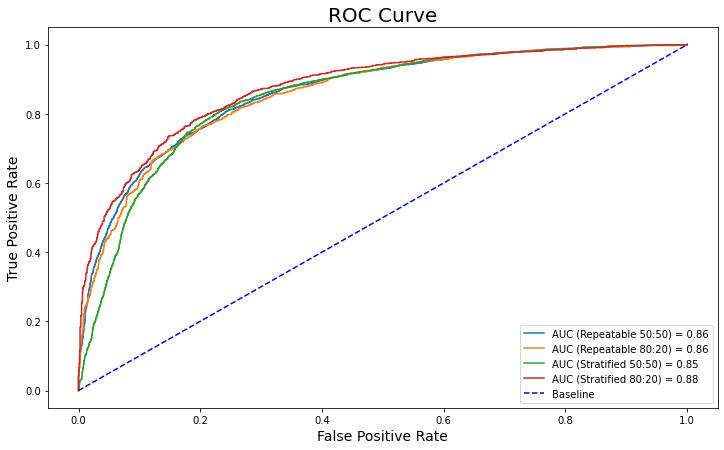

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

probs_m1 = model1.predict_proba(X_test1)[:, 1]
probs_m2 = model2.predict_proba(X_test2)[:, 1]
probs_m3 = model3.predict_proba(X_test3)[:, 1]
probs_m4 = model4.predict_proba(X_test4)[:, 1]


# y_test_int = y_test.replace({'Exited': 1, 'Not Exited': 0})
auc_mod1 = roc_auc_score(y_test1, probs_m1)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test1, probs_m1)

auc_mod2 = roc_auc_score(y_test2, probs_m2)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test2, probs_m2)

auc_mod3 = roc_auc_score(y_test3, probs_m3)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test3, probs_m3)
  
auc_mod4 = roc_auc_score(y_test4, probs_m4)
fpr_xg, tpr_xg, thresholds_xg = roc_curve(y_test4, probs_m4)

plt.figure(figsize=(12, 7))
plt.plot(fpr_lr, tpr_lr, label=f'AUC (Repeatable 50:50) = {auc_mod1:.2f}')
plt.plot(fpr_dt, tpr_dt, label=f'AUC (Repeatable 80:20) = {auc_mod2:.2f}')
plt.plot(fpr_rf, tpr_rf, label=f'AUC (Stratified 50:50) = {auc_mod3:.2f}')
plt.plot(fpr_xg, tpr_xg, label=f'AUC (Stratified 80:20) = {auc_mod4:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('ROC Curve', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend();